Paso 1: Análisis Exploratorio de Datos (EDA)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

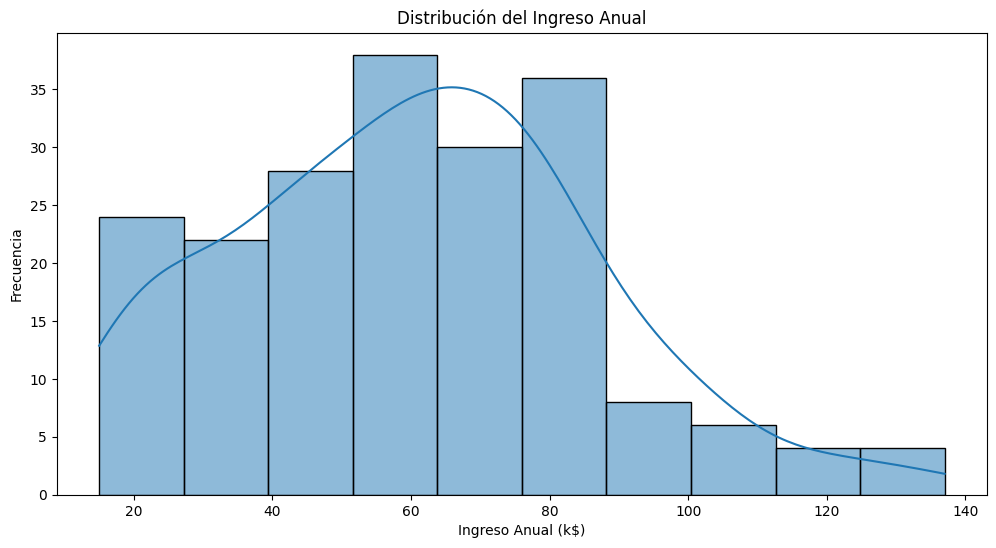

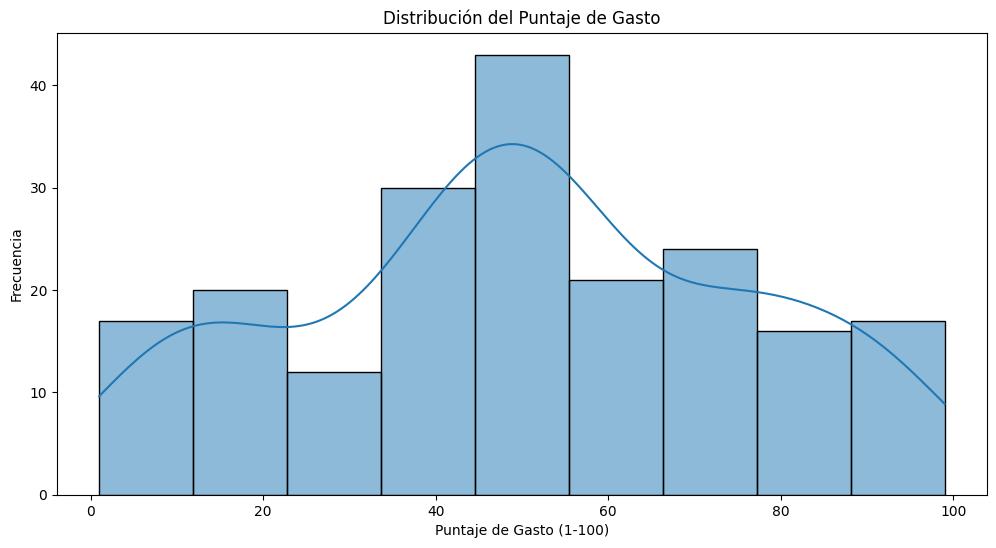

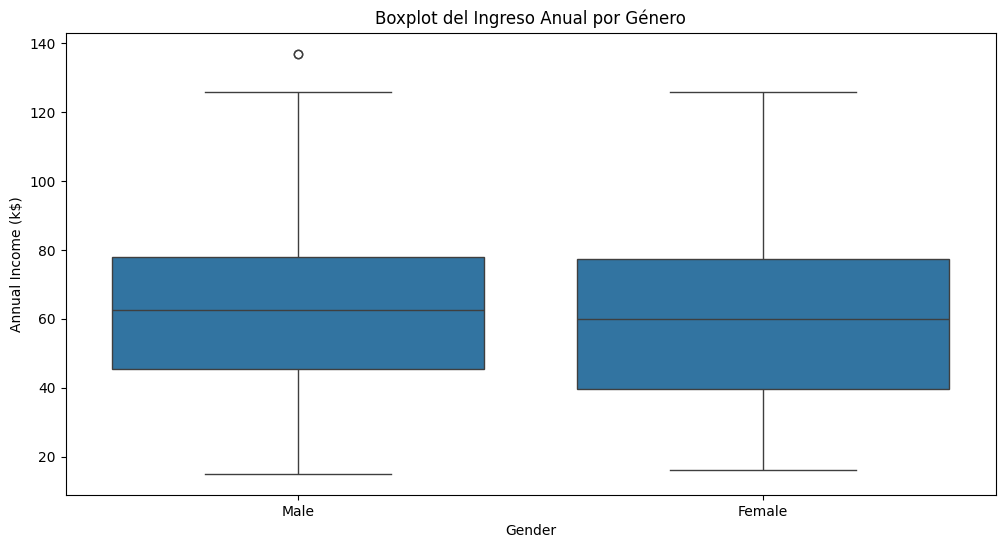

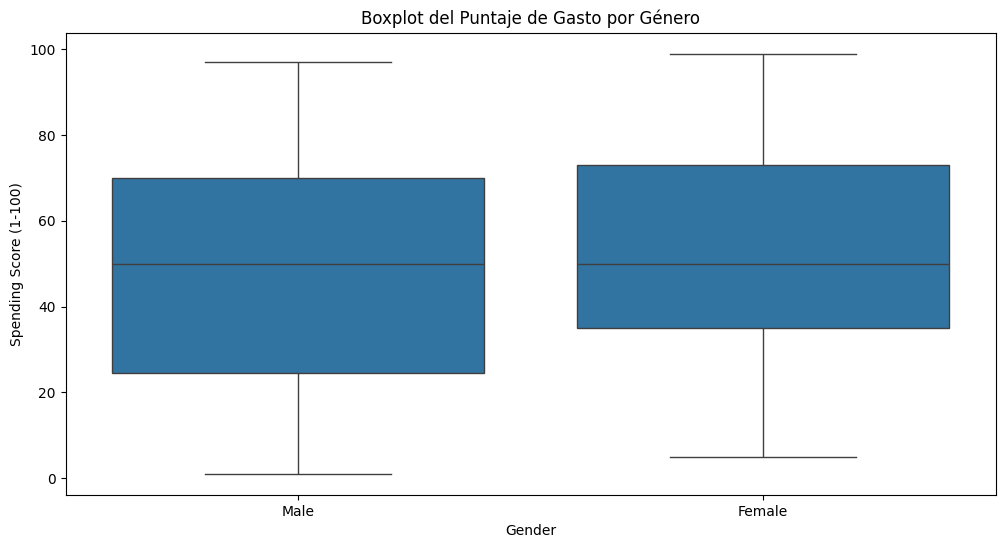

In [2]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
file_path = r"C:\Users\cristian.alcalde\Downloads\Tarea 4 - Algoritmos de Aprendizaje no supervisado\Anexo 5 - Dataset Mall Customer Segmentation\Mall_Customers.csv"
data = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
print(data.head())

# Información del dataset
print(data.info())

# Estadísticas descriptivas
print(data.describe())

# Visualizar distribución de las variables numéricas
plt.figure(figsize=(12, 6))
sns.histplot(data['Annual Income (k$)'], kde=True)
plt.title('Distribución del Ingreso Anual')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data['Spending Score (1-100)'], kde=True)
plt.title('Distribución del Puntaje de Gasto')
plt.xlabel('Puntaje de Gasto (1-100)')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar boxplots para identificar outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=data)
plt.title('Boxplot del Ingreso Anual por Género')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data)
plt.title('Boxplot del Puntaje de Gasto por Género')
plt.show()

Paso 2: Preprocesamiento de los Datos

In [1]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
file_path = r"C:\Users\cristian.alcalde\Downloads\Tarea 4 - Algoritmos de Aprendizaje no supervisado\Anexo 5 - Dataset Mall Customer Segmentation\Mall_Customers.csv"
data = pd.read_csv(file_path)

# Verificar valores faltantes
print(data.isnull().sum())

# Tratamiento de valores faltantes
# Por ejemplo, si hay valores nulos en alguna columna, puedes rellenarlos con la media o eliminar filas
data.dropna(inplace=True)  # Eliminar filas con valores nulos

# O si prefieres rellenar:
# data['Column_Name'].fillna(data['Column_Name'].mean(), inplace=True)

# Convertir variables categóricas a numéricas
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})  # Ejemplo: Encoding de género

# Normalizar o escalar características
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Gender', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Convertir de nuevo a DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=['Gender', 'Annual Income (k$)', 'Spending Score (1-100)'])

# Mostrar el DataFrame escalado
print(data_scaled_df.head())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
     Gender  Annual Income (k$)  Spending Score (1-100)
0 -1.128152           -1.738999               -0.434801
1 -1.128152           -1.738999                1.195704
2  0.886405           -1.700830               -1.715913
3  0.886405           -1.700830                1.040418
4  0.886405           -1.662660               -0.395980


Paso 3: Selección de Características

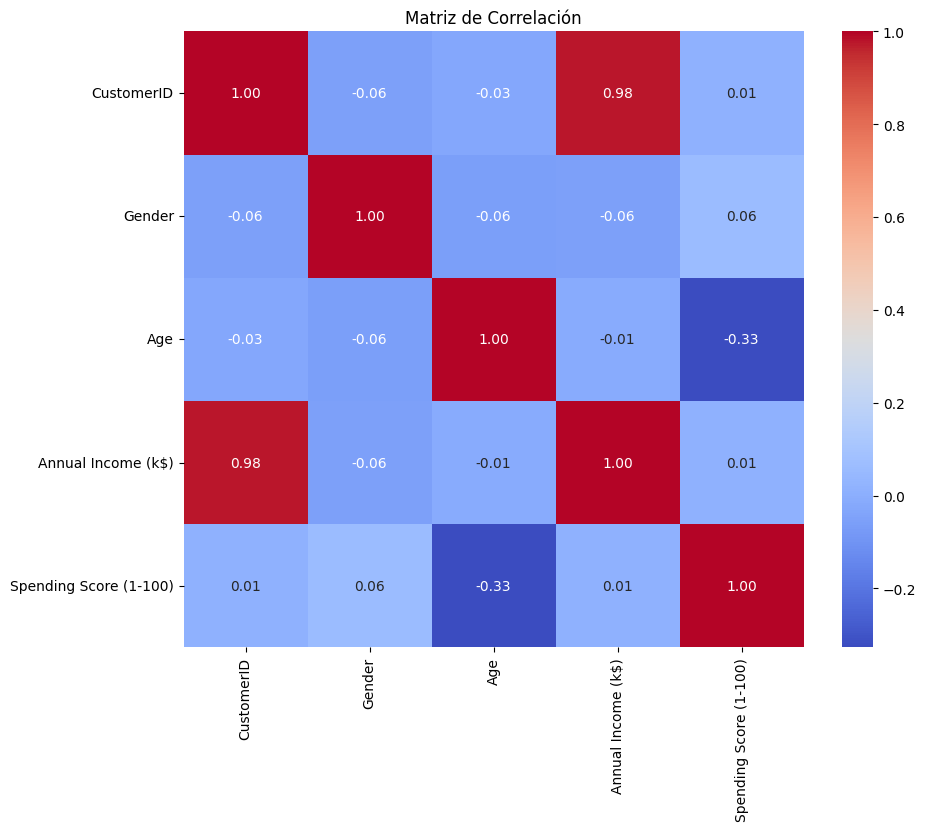

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [3]:
# Importar las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = r"C:\Users\cristian.alcalde\Downloads\Tarea 4 - Algoritmos de Aprendizaje no supervisado\Anexo 5 - Dataset Mall Customer Segmentation\Mall_Customers.csv"
data = pd.read_csv(file_path)

# Codificar la columna 'Gender' a numérico
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Visualizar las correlaciones
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Seleccionar características relevantes
# En este caso, seleccionamos 'Annual Income (k$)' y 'Spending Score (1-100)'
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Ver las primeras filas de las características seleccionadas
print(features.head())

Paso 4: Entrenamiento del Modelo K-Means

In [5]:
# Importar KMeans
from sklearn.cluster import KMeans

# Definir el número de clústeres
n_clusters = 4  # Puedes ajustar esto basándote en análisis anteriores (como el método del codo)

# Crear e instanciar el modelo KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Seleccionar características relevantes
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Entrenar el modelo
kmeans.fit(features)

# Predecir las etiquetas de los clústeres y agregarla al DataFrame original
data['Cluster'] = kmeans.labels_

# Ver las primeras filas con las etiquetas de los clústeres
print(data[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())

   Annual Income (k$)  Spending Score (1-100)  Cluster
0                  15                      39        3
1                  15                      81        0
2                  16                       6        3
3                  16                      77        0
4                  17                      40        3


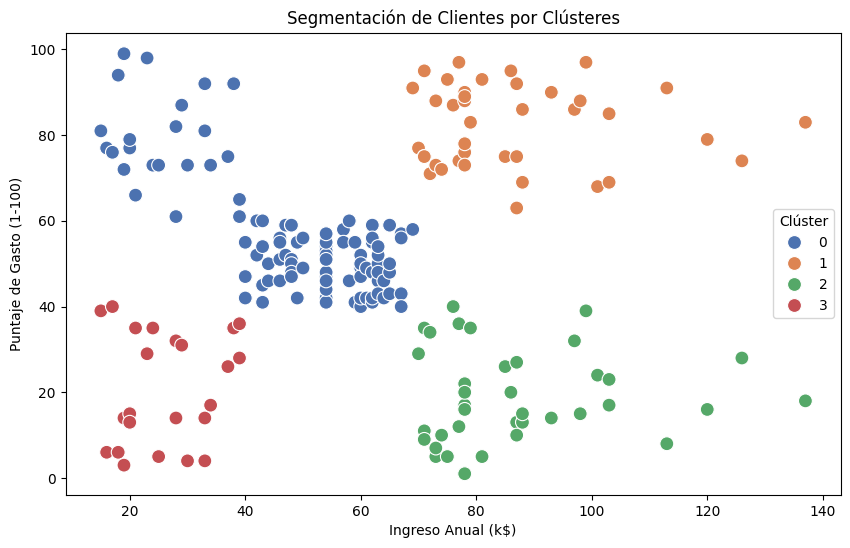

In [6]:
# Visualización de los clústeres
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='deep', s=100)
plt.title('Segmentación de Clientes por Clústeres')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend(title='Clúster')
plt.show()

Paso 5: Evaluación del Desempeño del Modelo

In [7]:
# Importar métricas necesarias
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calcular el Coeficiente de Silhouette
silhouette_avg = silhouette_score(data[['Annual Income (k$)', 'Spending Score (1-100)']], data['Cluster'])
print(f'Coeficiente de Silhouette: {silhouette_avg:.3f}')

# Calcular el Índice de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(data[['Annual Income (k$)', 'Spending Score (1-100)']], data['Cluster'])
print(f'Índice de Calinski-Harabasz: {calinski_harabasz:.3f}')

Coeficiente de Silhouette: 0.493
Índice de Calinski-Harabasz: 174.064


Paso 6: Visualización de Resultados

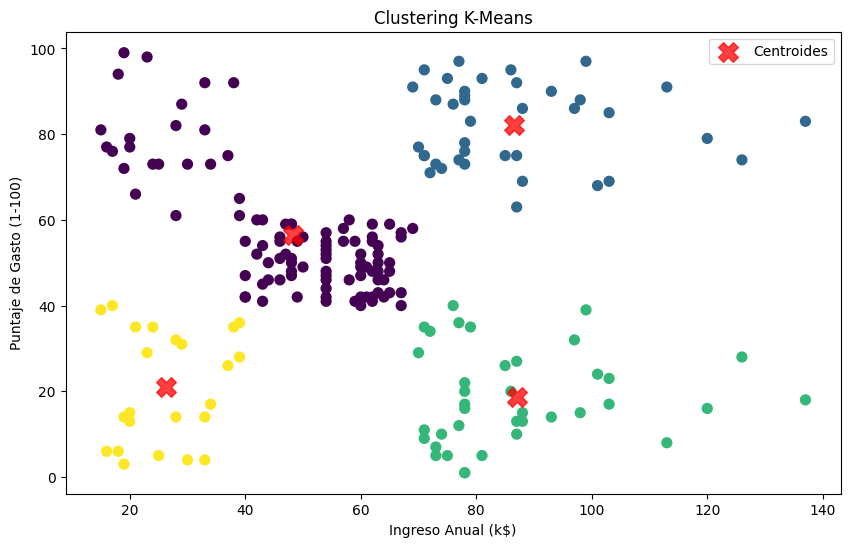

In [8]:
# Importar bibliotecas para visualización
import matplotlib.pyplot as plt

# Visualizar los clústeres
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], s=50, cmap='viridis')

# Visualizar los centroides
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroides')

plt.title('Clustering K-Means')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend()
plt.show()